In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:

inpath = "C:/Users/Diego Torres/OneDrive/Datasets/barplot_Adri.xlsx"
data=pd.read_excel(inpath)
print(data)

    Aperture  Class Weight     mm       Phi
0       1000      0.000000  10.00 -3.321928
1        850      0.000000   8.50 -3.087463
2        600      0.020087   6.00 -2.584963
3        500      0.006696   5.00 -2.321928
4        425      0.006696   4.25 -2.087463
5        300      0.026783   3.00 -1.584963
6        250      0.053565   2.50 -1.321928
7        180      0.408437   1.80 -0.847997
8        150      0.703047   1.50 -0.584963
9        125     46.729160   1.25 -0.321928
10        90     41.580181   0.90  0.152003
11        63     10.465350   0.63  0.666576


In [4]:
# Tus datos de Aperture
#aperture_values = [1000, 850, 600, 500, 425, 300, 250, 180, 150, 125, 90, 63]

# Calcular el número total de datos
#total_data = len(aperture_values)

n_bins = 8

# Calcula los límites de los bins
bin_edges = np.round(np.histogram_bin_edges(data.Aperture, bins=n_bins),2)
print(bin_edges.dtype)
print(type(bin_edges))
print(bin_edges)

# Restarle 0.001 al primer elemento
bin_edges[0] -= 0.001

# Sumarle 0.001 al último elemento
bin_edges[-1] += 0.001


print(bin_edges)

#print(type(bin_edges))


float64
<class 'numpy.ndarray'>
[  63.    180.12  297.25  414.38  531.5   648.62  765.75  882.88 1000.  ]
[  62.999  180.12   297.25   414.38   531.5    648.62   765.75   882.88
 1000.001]


In [10]:

# Usar la función cut() para dividir la variable en categorías
data['Class_Weight'] = round(data['Class_Weight'],2)
data['cut_data'] = pd.cut(data.Aperture, bins=bin_edges).astype(str)

# Definir una función que asigne valores ascendentes a cada categoría
def asignar_valores(categoria):
    global categoria_actual, valor_asignado
    if categoria != categoria_actual:
        valor_asignado += 1
        categoria_actual = categoria
    return valor_asignado

# Inicializar variables globales
categoria_actual = None
valor_asignado = 0

# Aplicar la función a la columna "Categoría" y crear la nueva columna "NuevoCampo"
data['order'] = data['cut_data'].apply(asignar_valores)


""" # Imprime los límites de los bins
print('Límites de los bins:')
for i in range(len(bin_edges) - 1):
    print(f'Bin {i + 1}: {bin_edges[i]} - {bin_edges[i + 1]}') 

# Crear el histograma con las frecuencias relativas y escala personalizada en el eje Y
plt.hist(data.Aperture, bins=n_bins, edgecolor='black', density=True)
plt.ylim(0,0.005)
# Modificar los valores en el eje Y para mostrarlos como porcentaje
#plt.gca().set_yticklabels(['{:.0f}%'.format(x * 10000) for x in plt.gca().get_yticks()])
# Definir una función de escala personalizada
def custom_scale(y):
    return y * 100  # Multiplicar por 100 para convertir a porcentaje

# Aplicar la escala personalizada en el eje Y
plt.gca().set_yscale('function', functions=(custom_scale, None)) """


#################
# Descriptivos
print(data)
print(' ')
print('Summary:')
data.info()
print(' ')
print('Descriptivos:')
print(data.describe().round(2).transpose())
print(' ')
print('Nulos por campo:')
print(data.isnull().sum())  # total de nulls por variable
print(' ')
print('Dimensiones:')
print(data.shape[0])




    Aperture  Class_Weight     mm       Phi            cut_data  order
0         63         10.47   0.63  0.666576    (62.999, 180.12]      1
1         90         41.58   0.90  0.152003    (62.999, 180.12]      1
2        125         46.73   1.25 -0.321928    (62.999, 180.12]      1
3        150          0.70   1.50 -0.584963    (62.999, 180.12]      1
4        180          0.41   1.80 -0.847997    (62.999, 180.12]      1
5        250          0.05   2.50 -1.321928    (180.12, 297.25]      2
6        300          0.03   3.00 -1.584963    (297.25, 414.38]      3
7        425          0.01   4.25 -2.087463     (414.38, 531.5]      4
8        500          0.01   5.00 -2.321928     (414.38, 531.5]      4
9        600          0.02   6.00 -2.584963     (531.5, 648.62]      5
10       850          0.00   8.50 -3.087463    (765.75, 882.88]      6
11      1000          0.00  10.00 -3.321928  (882.88, 1000.001]      7
 
Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to

In [11]:
aggregated_data = data.groupby(['cut_data', 'order'])['Class_Weight'].sum().reset_index().sort_values('order',ascending=True)
#################
# Descriptivos
print(data)
print(' ')

    Aperture  Class_Weight     mm       Phi            cut_data  order
0         63         10.47   0.63  0.666576    (62.999, 180.12]      1
1         90         41.58   0.90  0.152003    (62.999, 180.12]      1
2        125         46.73   1.25 -0.321928    (62.999, 180.12]      1
3        150          0.70   1.50 -0.584963    (62.999, 180.12]      1
4        180          0.41   1.80 -0.847997    (62.999, 180.12]      1
5        250          0.05   2.50 -1.321928    (180.12, 297.25]      2
6        300          0.03   3.00 -1.584963    (297.25, 414.38]      3
7        425          0.01   4.25 -2.087463     (414.38, 531.5]      4
8        500          0.01   5.00 -2.321928     (414.38, 531.5]      4
9        600          0.02   6.00 -2.584963     (531.5, 648.62]      5
10       850          0.00   8.50 -3.087463    (765.75, 882.88]      6
11      1000          0.00  10.00 -3.321928  (882.88, 1000.001]      7
 


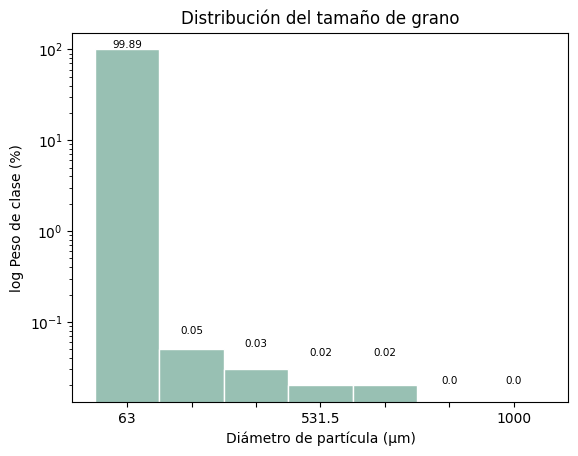

In [12]:
plt.bar(aggregated_data['cut_data'],aggregated_data['Class_Weight'], width=1, ec='white', color='#98c0b3')
# Personalizar el gráfico
plt.title('Histograma de Aperture (Escala Personalizada)')
plt.xlabel('Diámetro de partícula (µm)')
# Valores personalizados en el eje x
custom_xticks = [min(data['Aperture']), '', '', np.median(bin_edges), '','',max(data['Aperture'])]
plt.xticks(aggregated_data['cut_data'], custom_xticks, rotation=0)
#plt.ylim(0,1200)
plt.yscale('log')  # Escala logarítmica en el eje Y
plt.ylabel('log Peso de clase (%)')
plt.title('Distribución del tamaño de grano')

# Mostrar el valor de cada barra encima de las barras
for i, v in enumerate(aggregated_data['Class_Weight']):

    plt.text(i, round(v + 0.02,2), str(v), ha='center', va='bottom',fontsize=7.5)

""" # Crear un tercer eje arriba
ax2 = plt.twiny()
# Valores personalizados para el tercer eje
custom_top_axis_values = [1.1, 2.2, 3.3, 4.4, 5.5]
# Ubicación del tercer eje
ax2.set_xlim(ax2.get_xlim())
ax2.set_xticks(aggregated_data['Phi'])
ax2.set_xticklabels(custom_top_axis_values, fontsize=10)
ax2.set_xlabel('Valores del tercer campo') """

# Ajustar el espacio entre subgráficos
#plt.subplots_adjust(top=0.85)

# Guardar como un archivo PNG, JPG, PDF
plt.savefig('histograma_Gmas.png', dpi=300, bbox_inches='tight') #El argumento dpi controla la resolución en el caso de los formatos PNG y JPG. 
                                        #bbox_inches='tight' se utiliza para asegurarse de que los márgenes de la figura estén ajustados correctamente en la imagen guardada.

# Mostrar el histograma
plt.show()